In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv(r'C:\Users\OzturkNa\Downloads\Py\Life_Expectancy_Data.csv', sep=",")
df = df.dropna()   
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
lindf = df.copy()
multidf =df.copy()
polydf = df.copy()
RFdf = df.copy()
logdf = df.copy()

In [6]:
#LINEAR REGRESSION


lindf.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


<AxesSubplot:>

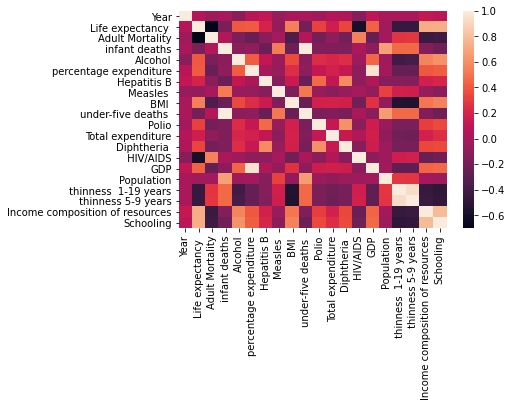

In [8]:
#heatmap 
corr = lindf.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [9]:
#creating a linear model between 'GDP' and 'percentage expenditure'
linear_reg = LinearRegression()
x = lindf.GDP.values.reshape(-1,1)
y = lindf['percentage expenditure'].values.reshape(-1,1)          

linear_reg.fit(x,y)

LinearRegression()

In [10]:
#y = a0 + a1*x 

a0 = linear_reg.predict(([[10000]]))       
print("a0: ", a0)

a1 = linear_reg.coef_
print("a1: ", a1)

a0:  [[1351.02549826]]
a1:  [[0.14705833]]


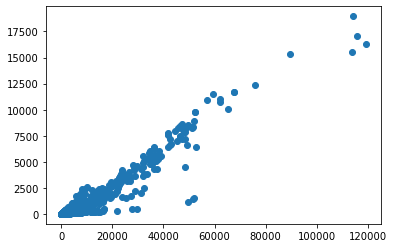

Mean Absolute Error:  50943.94783778521
Mean Squared Error:  3456291221.6604424
Root Mean Squared Error:  58790.23066514063


In [11]:
x_array = np.arange(min(lindf.GDP),max(lindf.GDP)).reshape(-1,1) 

plt.scatter(x,y)
y_head = linear_reg.predict(x_array)                                
plt.show()

from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))

In [12]:
print(r2_score(y, linear_reg.predict(x)))

0.920254296978608


In [ ]:
#Estimation has 92% accuracy

In [ ]:
#MultiLinear Regression

In [13]:
multidf.drop(["Country", "Status"], axis=1, inplace=True)             
x = multidf.iloc[:, [-2,-1]].values                                   
y = multidf["percentage expenditure"].values.reshape(-1,1)          

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [15]:
print("a0: ", lm.intercept_)
print("a1,a2: ", lm.coef_)

a0:  [-2564.65476544]
a1,a2:  [[1658.89564015  181.73904785]]


In [16]:
new_df = [[0.4,8], [0.5,10]]   
new_df = pd.DataFrame(new_df).T       
model.predict(new_df) 

array([[-1810.22698546],
       [12523.90083425]])

In [17]:
#rmse= root mean square error 
rmse = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
rmse

1553.6377730445927

In [18]:
model.score(x_train, y_train) 

0.19740481686106348

In [19]:
#CV r^2 value  
cross_val_score(model, x_train,  y_train, cv= 10, scoring="r2").mean()

0.18783558982603704

In [20]:
#prediction of train set values 
y_head = model.predict(x_test)
y_head[0:5]

array([[ 609.96624444],
       [-289.66298804],
       [-967.5917828 ],
       [-261.75755118],
       [1781.50646739]])

In [21]:
y_test_1 =np.array(range(0,len(y_test)))

Test r2 error =  0.17427106020350047


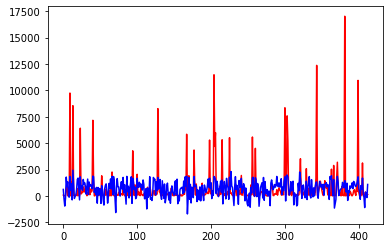

In [22]:
# r2 value: 
r2 = r2_score(y_test, y_head)
print("Test r2 error = ",r2) 

plt.plot(y_test_1,y_test,color="r")
plt.plot(y_test_1,y_head,color="blue")
plt.show()

In [ ]:
#Polynomial Regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures
linear_reg = LinearRegression()
x = polydf.GDP.values.reshape(-1,1)
y = polydf['percentage expenditure'].values.reshape(-1,1)          

linear_reg.fit(x,y)

LinearRegression()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

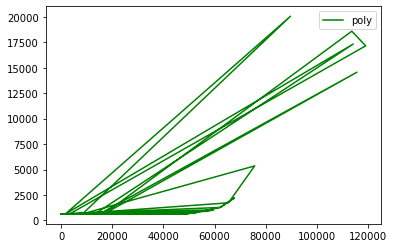

In [25]:
polynomial_regression = PolynomialFeatures(degree = 15)    
x_polynomial = polynomial_regression.fit_transform(x)

linear_reg2 = LinearRegression()
linear_reg2.fit(x_polynomial,y)

y_head = linear_reg2.predict(x_polynomial)

plt.plot(x,y_head,color="green",label="poly")
plt.legend()
plt.show()

In [26]:
pol_reg = PolynomialFeatures(degree = 8)                    
level_poly = pol_reg.fit_transform(x_train)                 
lm = LinearRegression()                                     
lm.fit(level_poly,y_train)

LinearRegression()

In [27]:
y_head = lm.predict(pol_reg.fit_transform(x_train))
y_test =np.array(range(0,len(y_train)))

r2 value:  0.6647617288254128


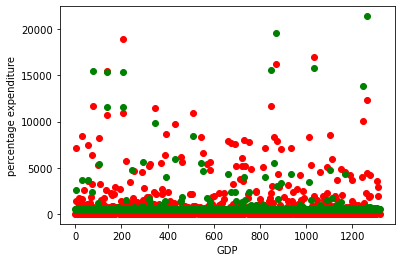

In [28]:
r2 = r2_score(y_train, y_head)
print("r2 value: ", r2)                              

plt.scatter(y_test, y_train, color="red")
plt.scatter(y_test, y_head, color = "g")
plt.xlabel("GDP")
plt.ylabel("percentage expenditure")
plt.show()

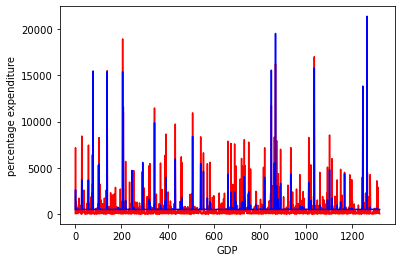

In [29]:
plt.plot(y_test,y_train, color="red")
plt.plot(y_test, y_head, color = "blue")
plt.xlabel("GDP")
plt.ylabel("percentage expenditure")
plt.show()

In [ ]:
#Logistic Regression Model

In [30]:
logdf.drop(["Country"], axis=1, inplace=True)  
logdf.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
logdf["Status"].value_counts()

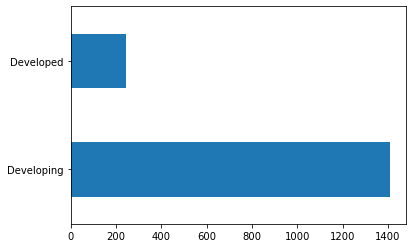

In [31]:
logdf["Status"].value_counts().plot.barh();

In [33]:
logdf.Status = [1 if each == "Developing" else 0 for each in logdf.Status]  

In [34]:
logdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1649.0,2.007841e+03,4.087711e+00,2000.00000,2005.000000,2.008000e+03,2.011000e+03,2.015000e+03
Status,1649.0,8.532444e-01,3.539695e-01,0.00000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
Life expectancy,1649.0,6.930230e+01,8.796834e+00,44.00000,64.400000,7.170000e+01,7.500000e+01,8.900000e+01
Adult Mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Hepatitis B,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01


In [35]:
y = logdf["Status"]
X_data = logdf.drop(["Status"], axis=1)

In [36]:
# Normalize
X = (X_data - np.min(X_data))/(np.max(X_data) - np.min(X_data)).values

In [38]:
log = sm.Logit(y, X)
log_model= log.fit()
log_model.summary()

         Current function value: 0.150274
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                 1649
Model:                          Logit   Df Residuals:                     1629
Method:                           MLE   Df Model:                           19
Date:                Fri, 19 May 2023   Pseudo R-squ.:                  0.6397
Time:                        20:33:44   Log-Likelihood:                -247.80
converged:                      False   LL-Null:                       -687.70
Covariance Type:            nonrobust   LLR p-value:                2.266e-174
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Year                                1.1540      0.454      2.541      0.011       0.264       2.044
Life expectancy                     3.9170      1.395      2.808      0.005       1.183       6.651
Adult Mortality                     8.9129      1.573      5.666      0.000       5.830      11.996
infant deaths                     193.0996    567.163      0.340      0.734    -918.519    1304.718
Alcohol                            -7.0471      0.741     -9.507      0.000      -8.500      -5.594
percentage expenditure              2.6330      2.749      0.958      0.338      -2.755       8.021
Hepatitis B                        -2.1891      0.551     -3.975      0.000      -3.269      -1.110
Measles                            -4.6191      8.644     -0.534      0.593     -21.561      12.323
 BMI                                0.6859      0.497      1.379      0.168      -0.289       1.661
under-five deaths                 428.0952    667.107      0.642      0.521    -879.411    1735.602
Polio                               0.4442      0.755      0.588      0.556      -1.036       1.924
Total expenditure                   0.4667      0.649      0.719      0.472      -0.805       1.738
Diphtheria                          1.4299      0.773      1.850      0.064      -0.085       2.945
 HIV/AIDS                        6172.1062    1.4e+05      0.044      0.965   -2.68e+05     2.8e+05
GDP                                -5.0199      2.755     -1.822      0.068     -10.419       0.379
Population                        -13.5912     11.515     -1.180      0.238     -36.159       8.977
 thinness  1-19 years              21.1931      7.053      3.005      0.003       7.370      35.016
 thinness 5-9 years               -11.7773      6.500     -1.812      0.070     -24.516       0.962
Income composition of resources    -0.7261      1.341     -0.541      0.588      -3.355       1.903
Schooling                          -2.5020      1.499     -1.669      0.095      -5.439       0.435
===================================================================================================

Possibly complete quasi-separation: A fraction 0.52 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [39]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = "liblinear")
log_model = log.fit(X,y)
log_model

LogisticRegression(solver='liblinear')

In [40]:
# constant value
log_model.intercept_

array([5.83327627])

In [41]:
log_model.coef_

array([[ 1.08208352, -1.39357844,  3.4092507 ,  0.47089776, -5.35962717,
        -0.78837698, -1.44070589,  0.37059599, -0.05002695,  0.43758173,
         0.22862697, -0.10185549,  0.72963257,  0.51727771, -1.44175632,
         0.42676196,  1.95007174,  1.79088634, -1.29839592, -1.92931239]])

In [42]:
y_pred = log_model.predict(X)   

In [43]:
confusion_matrix(y, y_pred)

array([[ 169,   73],
       [  45, 1362]], dtype=int64)

In [44]:
accuracy_score(y, y_pred)

0.9284414796846574

In [45]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       242
           1       0.95      0.97      0.96      1407

    accuracy                           0.93      1649
   macro avg       0.87      0.83      0.85      1649
weighted avg       0.93      0.93      0.93      1649



In [46]:
log_model.predict(X)[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [47]:
logit_roc_auc = roc_auc_score(y, log_model.predict(X))

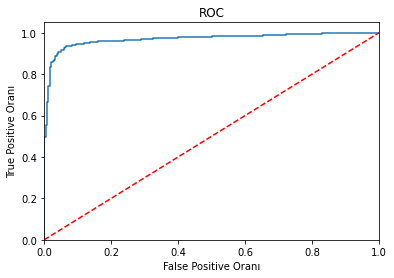

In [48]:
fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
log = LogisticRegression(solver = "liblinear")
log_model = log.fit(X_train,y_train)
log_model

LogisticRegression(solver='liblinear')

In [51]:
accuracy_score(y_test, log_model.predict(X_test))

0.9272727272727272

In [53]:
cross_val_score(log_model, X_test, y_test, cv = 10).mean()

0.9121212121212121